<a href="https://colab.research.google.com/github/RiskiSaraan/Tugas-Python_1101190123_Muhammad-Riski-Saraan/blob/main/Tugas%20Python11%3A%20Klasifikasi%20Daun_%201101190123_Muhammad%20Riski%20Saraan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
ls

'absen iot2.jpg'
'absensi iot 3.jpg'
'Bukti kehadiran .jpeg'
'Bukti kehadiran.jpeg'
'Bukti SS.jpeg'
 Classroom/
 coast_cdmc841.jpg
'Colab Notebooks'/
'Getting started.pdf'
 Image/
 Image_test.jpg
 IMG20190911172337.jpg
'IMG20190911172337 - Muhammad Riski Saraan.jpg'
 IMG_20200827_200946.jpg
'Kehadiran Asterisk.jpeg'
 kehadiran.jpg
'Klinik Asterisk Kehadiran.jpeg'
 OK/
'PPT DAN RESUME MEKANISME PERSALINAN D4 KEBIDANAN TK 2.rar'
 Screenshot_20200718-221629_WhatsApp.jpg
 Screenshot_20200725-094748_Zoom.jpg
 Screenshot_20200801-110057_Zoom.jpg
 Screenshot_20200801-212631_Zoom.jpg
 Screenshot_20200808-104856_Zoom.jpg
 Screenshot_20200808-145726_Zoom.jpg
 Screenshot_20200808-212520_Zoom.jpg
 Screenshot_20200815-100552_Zoom.jpg
'Screenshot 2020-10-08 183457.png'
 Screenshot_20201018-124948_WhatsApp.jpg
'SELASA(3)_TT06(D)_MUHAMMAD RISKI SARAAN_1101190123_KAP.jpg'
'SELASA(3)_TT06(D)_MUHAMMAD RISKI SARAAN_1101190123_KAP.pdf'
 TT-43-06_1_D-GAME.rar
'TT-43-06 Charger Tenaga Air.gdoc'
'TT4306_MUHAM

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Image")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)


['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [10]:
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(276, 64, 64, 3)
(92, 64, 64, 3)


In [11]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [12]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [14]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [15]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
9/9 [==============================] - 1s 88ms/step - loss: 1.5818 - accuracy: 0.3007 - val_loss: 1.4414 - val_accuracy: 0.2500
Epoch 2/25
9/9 [==============================] - 1s 69ms/step - loss: 1.3065 - accuracy: 0.4674 - val_loss: 1.2871 - val_accuracy: 0.4239
Epoch 3/25
9/9 [==============================] - 1s 70ms/step - loss: 1.1442 - accuracy: 0.5362 - val_loss: 1.1309 - val_accuracy: 0.5543
Epoch 4/25
9/9 [==============================] - 1s 69ms/step - loss: 1.0160 - accuracy: 0.5870 - val_loss: 1.0901 - val_accuracy: 0.6087
Epoch 5/25
9/9 [==============================] - 1s 70ms/step - loss: 0.9480 - accuracy: 0.6232 - val_loss: 0.9602 - val_accuracy: 0.5652
Epoch 6/25
9/9 [==============================] - 1s 71ms/step - loss: 0.8517 - accuracy: 0.6630 - val_loss: 0.9426 - val_accuracy: 0.6304
Epoch 7/25
9/9 [==============================] - 1s 69ms/step - loss: 0.7744 - accuracy: 0.6957 - val_loss: 0.8163 - val_accuracy: 0.6848
Epoch 8/25
9/9 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


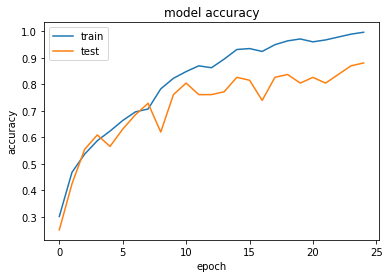

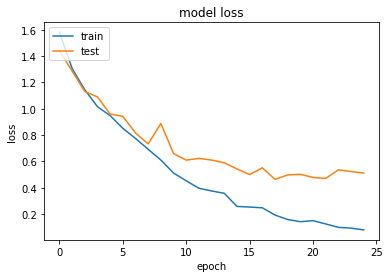

In [16]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.65      0.79      0.71        14
      GMB_06       1.00      0.25      0.40         4
      GMB_08       1.00      1.00      1.00        23
      GMB_10       0.90      0.85      0.88        33
      GMB_11       0.90      1.00      0.95        18

    accuracy                           0.88        92
   macro avg       0.89      0.78      0.79        92
weighted avg       0.89      0.88      0.87        92



In [18]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [19]:
import cv2
import matplotlib.pyplot as plt
image1='Image_test.jpg'

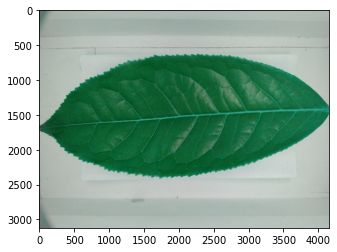

In [20]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [21]:
image_testing = Image.open('Image_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [22]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [23]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.37035897 0.15797082 0.47167018]]
['GMB_08']
